<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\prana\AppData\Local\Temp\ipykernel_12844\2360237502.py:8: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv("D:\Pranav\CL_4\BI\Datasets\Mall_Customers.csv")


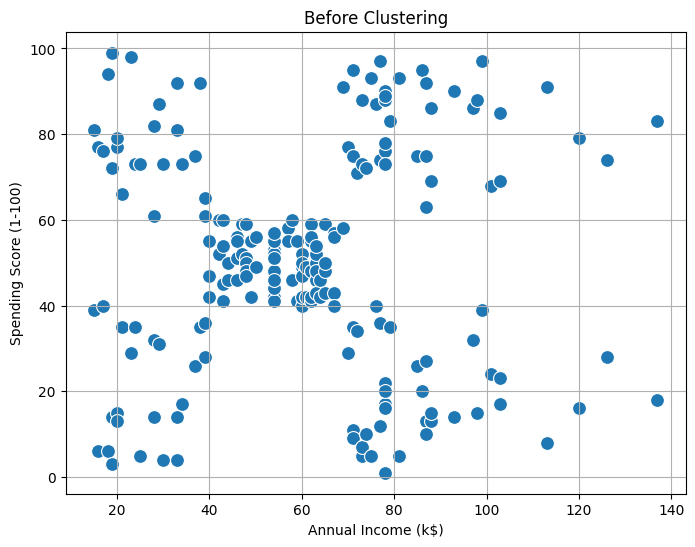

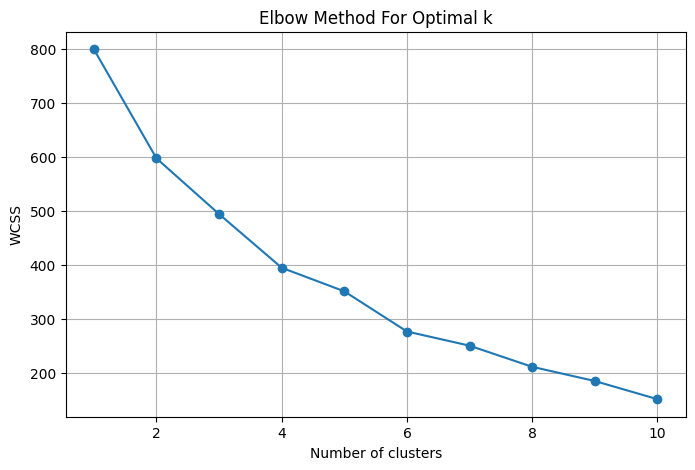

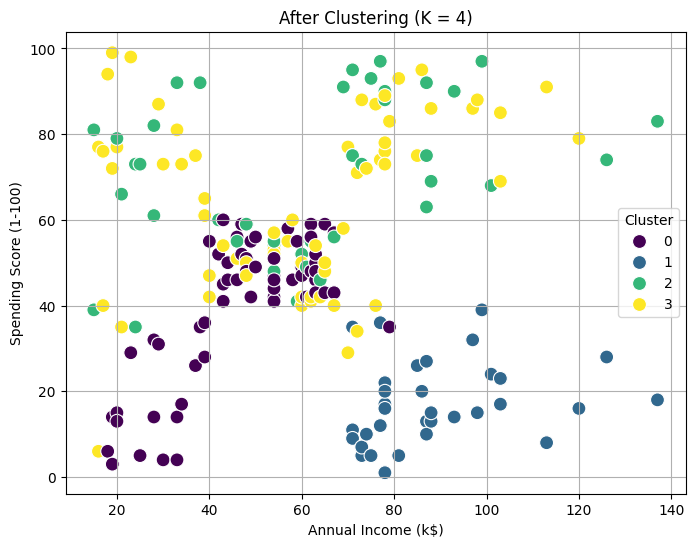

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler  # LabelEncoder to convert categorical data into numbers, standard to normalise feature imp for k-means
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("D:\Pranav\CL_4\BI\Datasets\Mall_Customers.csv")

# Encode 'Genre' (Gender) to numerical
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Genre'])  # Convert the Genre (gender) column from text (Male, Female) to numbers (0 or 1) using LabelEncoder, 0 for Female, 1 for Male

# Select features for clustering
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  #Select the features to use for clustering. These are all numeric and suitable for K-Means

# Feature scaling
scaler = StandardScaler()   # Standardize the data so that each feature has a mean = 0 and standard deviation = 1
X_scaled = scaler.fit_transform(X)  # This avoids one feature (e.g., income) dominating the others due to its scale

# -----------------------------
# 📈 Plot BEFORE Clustering
# -----------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', s=100)
plt.title("Before Clustering")
plt.grid(True)
plt.show()

# -----------------------------
# 📉 Elbow Method to find k
# -----------------------------
# wcss - is a metric used to evaluate how compact the clusters are. The lower the WCSS, the tighter the clusters.
wcss = []    #Create an empty list called wcss to store wcss value for each value of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)  # For each value of i, you're creating a new KMeans object, n_clusters=i: Tells KMeans how many clusters to form 42 - algorithm will behave the same way every time
    kmeans.fit(X_scaled)  # trains the KMeans algorithm on your dataset (X_scaled) is your feature matrix(gender, age,etc)
    wcss.append(kmeans.inertia_)  # after fitting returns internia(sum of squared distances between each point and its closest cluster center) i.e added to wcss
# The algorithm runs:
# Initialization: Randomly places k cluster centers.
# Iteration: Assigns data points to the nearest center, then recalculates cluster centers.
# Repeats this until the cluster assignments stop changing (or it hits a max number of iterations).

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# -----------------------------
# ✅ Apply K-Means Clustering
# -----------------------------
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)   # runs the K-Means algorithm on your preprocessed data, Predicts the cluster label (0, 1, 2, or 3) for each data point, returns a 1D array like like [1,,2,0,1,3...], data['cluster] - adds a new column called 'Cluster' to your original data DataFrame

# -----------------------------
# 🧪 Plot AFTER Clustering
# -----------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)
plt.title("After Clustering (K = 4)")
plt.grid(True)
plt.show()
